In [63]:
#Importing essential libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [64]:
#Reading in the file

df=pd.read_csv(r"C:\Users\Eva\Downloads\Sleep and Health Lifestyle New\Sleep_health_and_lifestyle_dataset.csv")


In [65]:
#Checking for data information and head of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [66]:
#Setting code to view the entire column of the data incase you have more columns than this. 
#The importance of this code is to view all rows and columns as they are in the dataset if need be.

pd.set_option('display.max.columns',None)
pd.set_option('display.max.rows',None)

df.head()



,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [67]:
#Checking for duplicated values

df.duplicated().sum()

0

In [68]:
#Viewing the summary statistics of our dataset
#This displays the summary statistics of all the numerical column in the data.

df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [69]:
#Dropping the person ID column as it is of no use to the analysis

df.drop(['Person ID'], axis=1,inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [70]:
#Checking the dimension of our data , that is number of rows and columns in the dataset

df.shape

(374, 12)

In [71]:
#Checking for null rows in pur data

df.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [72]:
#Replacing values in the BMI Category with appropriate values for easy comprehension

df['BMI Category'].replace('Normal Weight','Normal',inplace=True)

In [73]:
#Filling null values in the 'sleep disorder column' with the mode,which is the ideal method of filling null textual values in a column
df['Sleep Disorder'].fillna('No Sleeping Disorder',inplace=True)
df.isnull().sum()
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleeping Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleeping Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleeping Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [74]:
#Creating an age category function column to put a clear demarcation for the age group

def Age_Category(Age):
    if Age<36:
        return "Youth"
    else:
        return "Adult"
    
    
#Apply the function to take effect in the dataset

df['Age_category']=df['Age'].apply(Age_Category)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleeping Disorder,Youth
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleeping Disorder,Youth
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleeping Disorder,Youth
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Youth
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Youth


In [75]:
#Converting the 'Sleep Duration column' into minutes for comprehensive analysis

df['Sleep Duration']=df['Sleep Duration']*60
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_category
0,Male,27,Software Engineer,366.0,6,42,6,Overweight,126/83,77,4200,No Sleeping Disorder,Youth
1,Male,28,Doctor,372.0,6,60,8,Normal,125/80,75,10000,No Sleeping Disorder,Youth
2,Male,28,Doctor,372.0,6,60,8,Normal,125/80,75,10000,No Sleeping Disorder,Youth
3,Male,28,Sales Representative,354.0,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Youth
4,Male,28,Sales Representative,354.0,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Youth


In [76]:
# Define a function to categorize blood pressure readings

def Blood_pressure_category(Blood_Pressure):
    systolic, diastolic = map(int, Blood_Pressure.split('/'))
    if systolic < 110 and diastolic <= 70:
        return 'Low'
    elif 110 < systolic <= 139 and diastolic <= 80:
        return 'Normal'
    else:
        return 'Hypertensive'

# Apply the function to categorize blood pressure readings
df['Blood_Pressure_Category'] = df['Blood Pressure'].apply(Blood_pressure_category)
    




In [77]:
#Checking to see that the above function has taken effect

df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_category,Blood_Pressure_Category
0,Male,27,Software Engineer,366.0,6,42,6,Overweight,126/83,77,4200,No Sleeping Disorder,Youth,Hypertensive
1,Male,28,Doctor,372.0,6,60,8,Normal,125/80,75,10000,No Sleeping Disorder,Youth,Normal
2,Male,28,Doctor,372.0,6,60,8,Normal,125/80,75,10000,No Sleeping Disorder,Youth,Normal
3,Male,28,Sales Representative,354.0,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Youth,Hypertensive
4,Male,28,Sales Representative,354.0,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Youth,Hypertensive


In [78]:
# Replace 'clean_data.csv' with the desired filename

filename = 'Sleep_and_Lifestyle_clean_data.csv'

# Save the DataFrame to a CSV file

df.to_csv(filename, index=False)
#Incase you have to save your clean file after data clenaing .

In [79]:
#Distinguishing cat_features from other columns in the data

cat_features=df.select_dtypes(include=('object','category'))
cat_features.head()

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder,Age_category,Blood_Pressure_Category
0,Male,Software Engineer,Overweight,126/83,No Sleeping Disorder,Youth,Hypertensive
1,Male,Doctor,Normal,125/80,No Sleeping Disorder,Youth,Normal
2,Male,Doctor,Normal,125/80,No Sleeping Disorder,Youth,Normal
3,Male,Sales Representative,Obese,140/90,Sleep Apnea,Youth,Hypertensive
4,Male,Sales Representative,Obese,140/90,Sleep Apnea,Youth,Hypertensive


In [80]:
#Dropping Blood Pressure column as it is evidently a numerical columns saved as an object column due to the character"/" in the column

cat_features.drop(['Blood Pressure'],axis=1,inplace=True)



In [81]:
#Checking the cat_feature column

cat_features.head()

,Gender,Occupation,BMI Category,Sleep Disorder,Age_category,Blood_Pressure_Category
0,Male,Software Engineer,Overweight,No Sleeping Disorder,Youth,Hypertensive
1,Male,Doctor,Normal,No Sleeping Disorder,Youth,Normal
2,Male,Doctor,Normal,No Sleeping Disorder,Youth,Normal
3,Male,Sales Representative,Obese,Sleep Apnea,Youth,Hypertensive
4,Male,Sales Representative,Obese,Sleep Apnea,Youth,Hypertensive


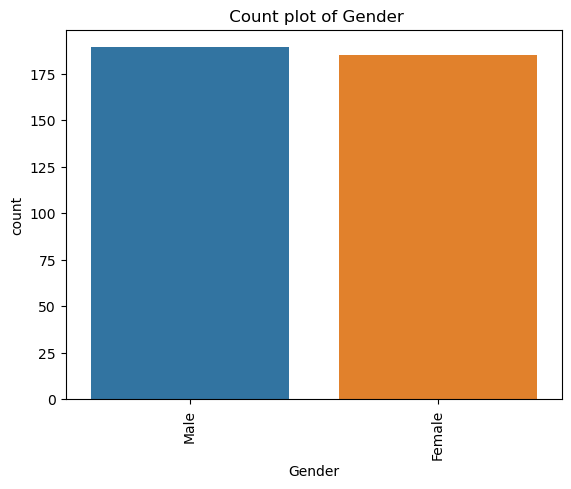

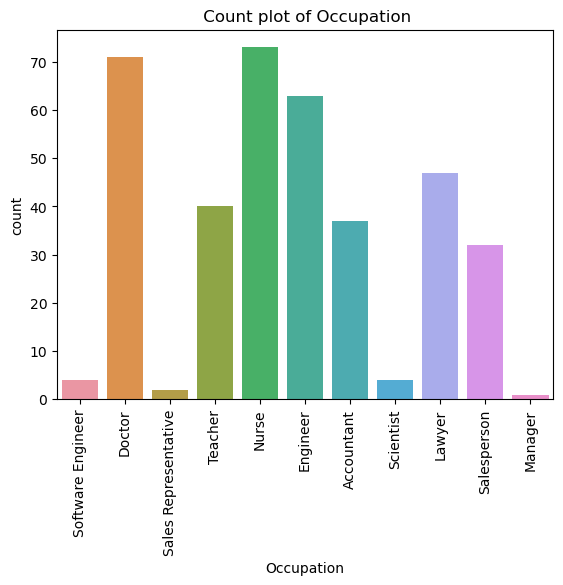

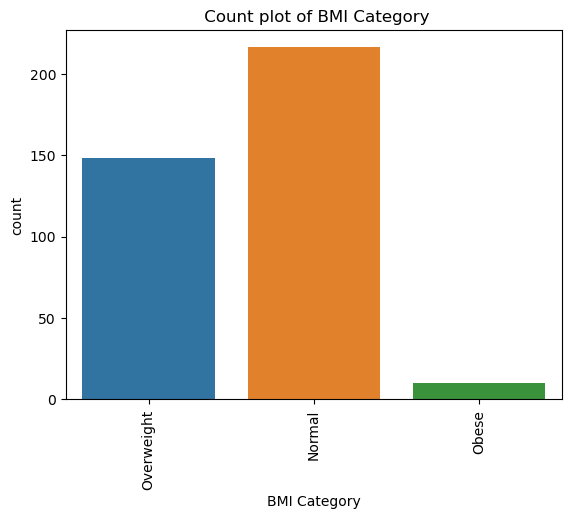

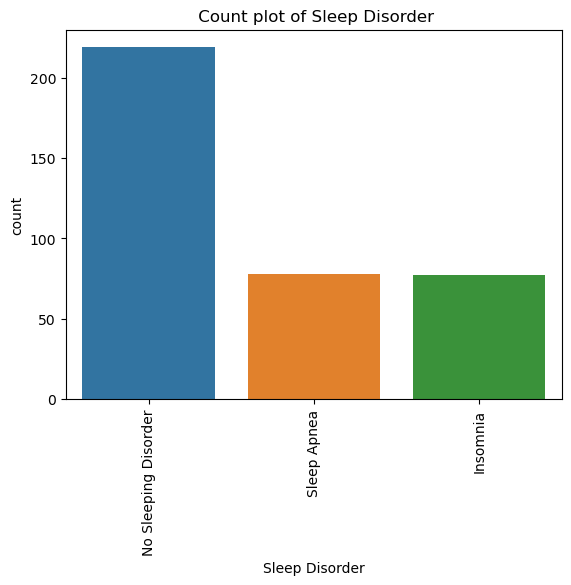

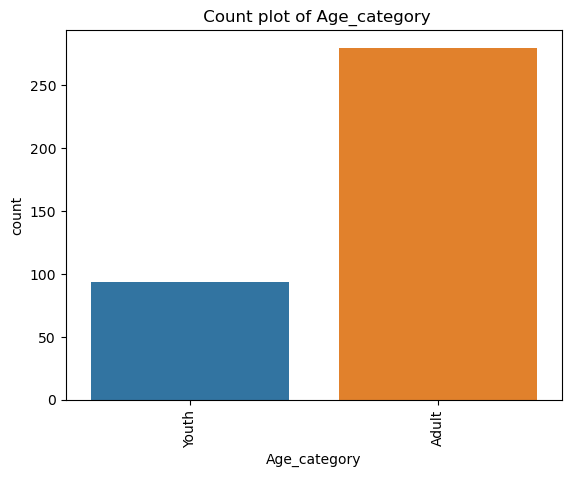

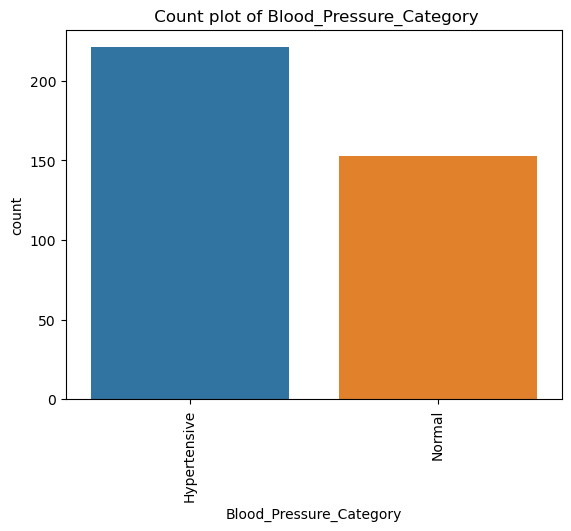

In [82]:
#Plotting graphs using' for loop' to check the distribution of values in each column.

for col in cat_features:
    sb.countplot(x=col,data=df)
    plt.title(f' Count plot of {col}')
    plt.xticks(rotation= 90)
    plt.show()
    

In [83]:
#The first plot is a representation of the number of the seperate gender in the dataset.
#The second plot is the presentation of the distinct occupation of the patients.
#The third plot displays the categorized body mass index(BMI) of the patients.
#The next plot notes the types of sleep disorder recorded in the this dataset.
#The Age_category plot summarizes the age group present in the dataset(youth and adult)
#The last plot categorizes the blood pressure reading of the patients in the data.

## DATA VISUALIZATION

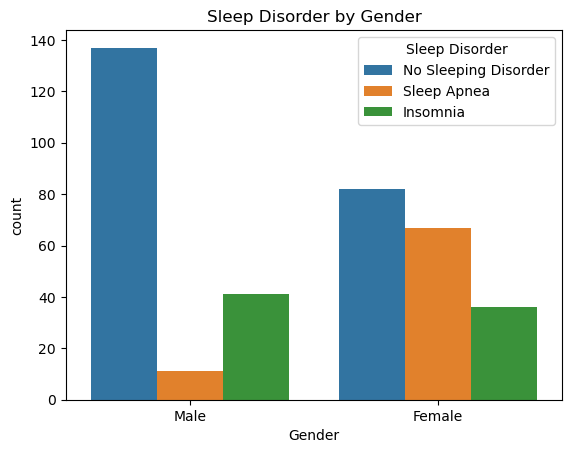

In [84]:
sb.countplot(x=df['Gender'],hue=df['Sleep Disorder'])
plt.title('Sleep Disorder by Gender')
plt.show()

 In relation to the plot above , it can be noted that the  female gender tend to have a high rate sleep disorder than the male gender.
There is a high record of a good sleep lifestyle with the male gender and a low record of sleep apnea and Insonmia according to the data.


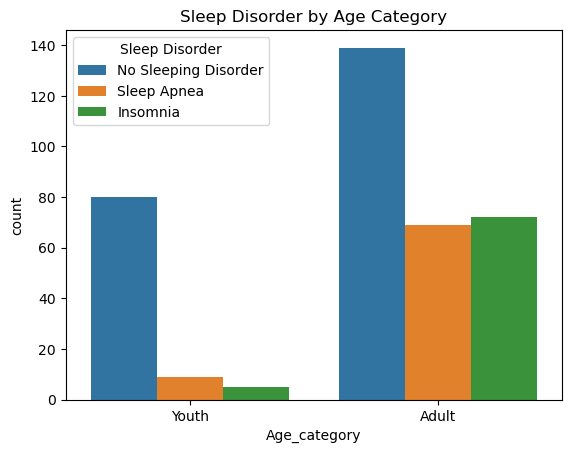

In [85]:
sb.countplot(x=df['Age_category'],hue=df['Sleep Disorder'])
plt.title('Sleep Disorder by Age Category')
plt.show()

This plot communicates the age group with high sleep disorder which is the adult and little to no record of sleep disorder amongst the youth.
The question might pop up seeing as the category present only two age group(youth and adult),it is safe to say that children do not get issues with blood pressure and sleep disorder as such information is not recorded in the data.
Not to overlook the fact the adult also possess a high rate of 'no sleep disorder',it is notable to say that the data records more of the adult agegroup than the youth.

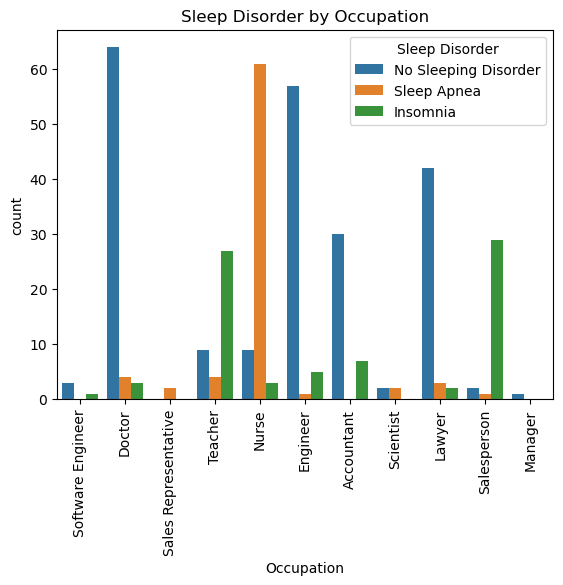

In [86]:
sb.countplot(x=df['Occupation'],hue=df['Sleep Disorder'])
plt.title('Sleep Disorder by Occupation')
plt.xticks(rotation=90)
plt.show()

This plot embodies the distribution of sleep disorder amongst the different patients according to their occupation.
The doctors are shown to have a good sleep lifestyle ,following closely by the engineers,lawyers,accountants and others.
It simultaneously displays the significant height in the record of "Sleep apnea" for the nurses.
The plot also displays a high record of "Insomnia" amogst the salesperson occupation and the teachers.
Asides the point above , we also see how "sleep apnea " and "insomnia" is sparsely scattered amongst other occupations.

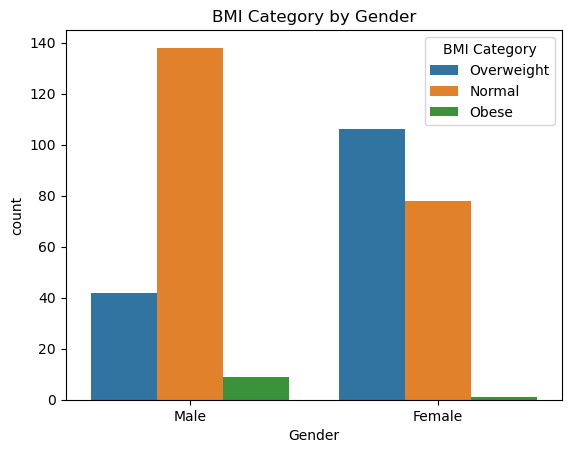

In [87]:
sb.countplot(x=df['Gender'],hue=df['BMI Category'])
plt.title('BMI Category by Gender')
plt.show()

This plot captures the variance of the patient's body mass between the male and female.
The male gender displays a significant number of normal body mass, followed by a minimum number of overweight, and virtually no record of obese.
The female gender records a high number of overweight compared to the male ,and an insignificant count of obese and a little bit over average  amount of normal weight females.
This explains the reason for the large record of "Sleep apnea" and "Insomnia" in the female gender.

In [88]:
Occupation_by_sleep_duration = df.groupby ('Occupation')['Sleep Duration'].sum()
Occupation_by_sleep_duration                                              

Occupation
Accountant              15792.0
Doctor                  29694.0
Engineer                30192.0
Lawyer                  20898.0
Manager                   414.0
Nurse                   30936.0
Sales Representative      708.0
Salesperson             12294.0
Scientist                1440.0
Software Engineer        1620.0
Teacher                 16056.0
Name: Sleep Duration, dtype: float64

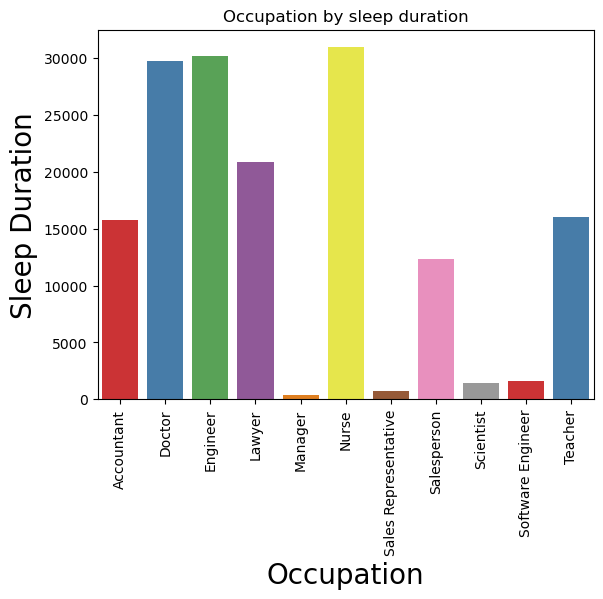

In [89]:
sb.barplot(x=Occupation_by_sleep_duration.index, y=Occupation_by_sleep_duration.values, palette=('Set1'))
plt.xticks(rotation=90)
plt.title('Occupation by sleep duration')
plt.xlabel('Occupation', fontsize=20)
plt.ylabel('Sleep Duration', fontsize=20)
plt.show()

This barchart present the comparison of sleep duration(sleep time)by the different occupations recorded in the data.
The top 5 occupations that gets enough time to sleep are the nurses,doctors,engineers,lawyers and teachers.
Skimming through these plots , it is noted that although the nurses get enough time to sleep ,they have the highest record of sleep apnea .
Also the physical activity of the nurses are way strenous and has a high record of stress level,meaning that the amount of time they have to sleep commensurate the time for work which gives the the absence of balance.

In [90]:
Stress_level_by_Occupation = df.groupby ('Occupation')['Stress Level'].sum()
Stress_level_by_Occupation  

Occupation
Accountant              170
Doctor                  478
Engineer                245
Lawyer                  238
Manager                   5
Nurse                   405
Sales Representative     16
Salesperson             224
Scientist                28
Software Engineer        24
Teacher                 181
Name: Stress Level, dtype: int64

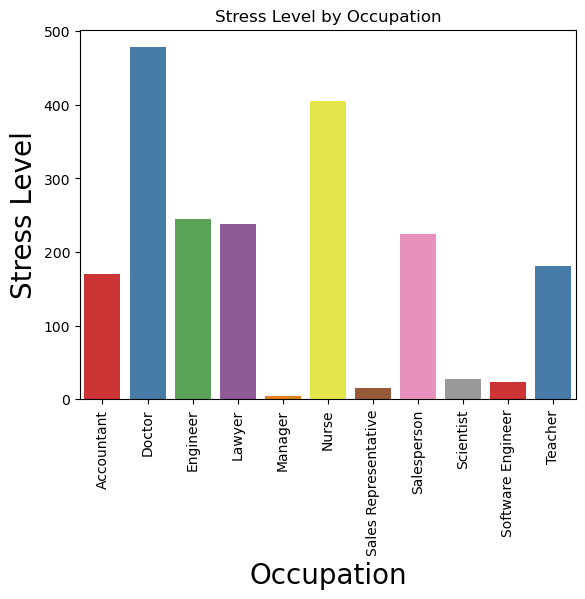

In [91]:
sb.barplot(x=Stress_level_by_Occupation.index, y=Stress_level_by_Occupation.values, palette=('Set1'))
plt.xticks(rotation=90)
plt.title('Stress Level by Occupation')
plt.xlabel('Occupation', fontsize=20)
plt.ylabel('Stress Level', fontsize=20)
plt.show()

This charts reveals the stress level by each occupation.
It conveys the doctors ,nurses ,engineers,lawyers,and salesperson as occupations with the highest stress level.
The doctors are seen to have high stress level ,enough sleep duartion(sleep time),normal body weight which result in a high rate of "no sleep disorder".
Juxtaposing this information to the nurses as they tend to be in the same field(medical),it is expected that there should be a low or no record of sleep disorder which is not the case as the record of overweight amongst the nurses is high.
This relays the importance of staying fit as it influences a healthy lifestyle., 

In [92]:
Daily_steps_by_Occupation = df.groupby ('Occupation')['Daily Steps'].sum()
Daily_steps_by_Occupation  

Occupation
Accountant              254600
Doctor                  483400
Engineer                376800
Lawyer                  360100
Manager                   5500
Nurse                   588200
Sales Representative      6000
Salesperson             192000
Scientist                21400
Software Engineer        23200
Teacher                 238300
Name: Daily Steps, dtype: int64

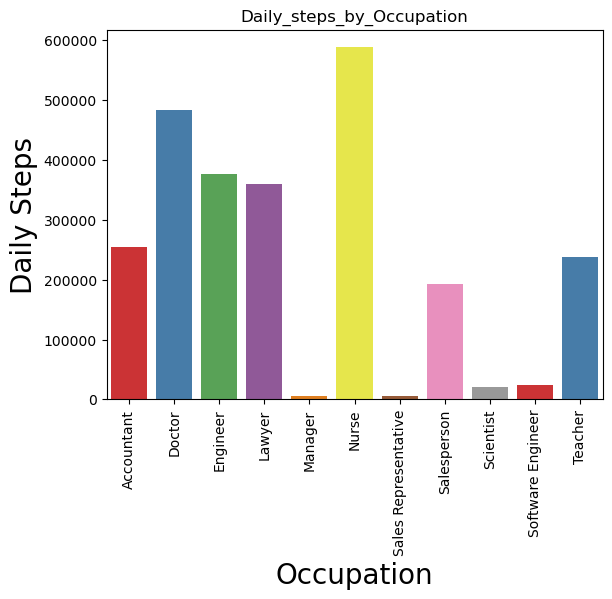

In [93]:
sb.barplot(x=Daily_steps_by_Occupation.index, y=Daily_steps_by_Occupation.values, palette=('Set1'))
plt.xticks(rotation=90)
plt.title('Daily_steps_by_Occupation')
plt.xlabel('Occupation', fontsize=20)
plt.ylabel('Daily Steps', fontsize=20)
plt.show()

This chart displays the aggregate of daily steps by each occupation. The chart tells nurses as the occupation with more steps followed by doctors,engineers,lawyers. It can be deduced that the profession in the medical team have a high physical activity level.

## FINDINGS
With a prior knowledge to the importance of sleep , it is pertinent to note that there are factors that causes deprivation of sleep;sleep apnea, amongst others.It is also a fact that in 24hours ,the standard time appropriate for an adult to sleep is 7-9hours,hours lesser than these should not be a constant habit as this could have some health-depreciating effect.

This dataset revolves around the factors that influences sleep disorder in patients; -According to the data , it can be denoted that profession in the medical field ,the nurse and doctors have a high stress level and record a lot of daily steps .This is a factor that influences sleep health largely . The medical field should employ more manpower, thereby giving the patients more time for enough rest .

-The BMI Category which is divided into the 'Normal', 'Overweight', 'Obese',has shown that there are a lot of females who are nurses on the overweight side which explains the rise in hypertension amongst them.Comaparing this information to the doctors who also work in the medical team, the doctors are seen to have a really low record of sleep disorder which signifies that they stay fit. Exercising ,dieting and staying fit will enhance a good sleep habit amongst the nurses if emulated.

-The nurses in this data seem to have a high level of hypertension, due to stress from physical activities during the day and not enough time to sleep. In order to facilitate good health and sleep habit , unclustered shift and necessary holidays is a prerequisite.

-The sales person is also another occupation that registers a high level of insomnia ,due to overweight and a high stress level. The prerequisite mentioned above for the nurses and staying fit should be maintained to improve health.

Scrutinizing this data effectively, our domain knowledge of this occupations largely explains the causes of sleep disorder excluding the personal attribute(body mass) of patients which should be a "normal weight" in order to achieve a satisfying sleep and health lifestyle.

## CONCLUSION
As human beings , sleep plays a crucial role in our physical ,mental ,cognitive and overall quality of life. Moreso, there are certain factors that inflences sleep disorder, thereby causing harm to the human body which calls for attention in order to improve the health of a person. This dataset revolves around certain patients,and necessary information that might be affecting their sleep lifestyle.

## DATA TRANSFORMATION

In order to create a model for our data , there are steps that should be taken. For a supervised machine learning method , we have our target/label. All we need are features that have a correlating relationship with this target/label in order to get a befitting model for the data.

In [94]:
#Scrutinizing some perceived features .

cat_features['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [95]:
cat_features['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [96]:
cat_features['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [97]:
cat_features['Sleep Disorder'].value_counts()

Sleep Disorder
No Sleeping Disorder    219
Sleep Apnea              78
Insomnia                 77
Name: count, dtype: int64

In [98]:
#Importing the Label Encoder to encode our features for efficiency

from sklearn.preprocessing import LabelEncoder

In [99]:
#Assigning our Label Encoder to a variable

le=LabelEncoder()

In [100]:
#Rechecking our cat_features before encoding 

cat_features

,Gender,Occupation,BMI Category,Sleep Disorder,Age_category,Blood_Pressure_Category
0,Male,Software Engineer,Overweight,No Sleeping Disorder,Youth,Hypertensive
1,Male,Doctor,Normal,No Sleeping Disorder,Youth,Normal
2,Male,Doctor,Normal,No Sleeping Disorder,Youth,Normal
3,Male,Sales Representative,Obese,Sleep Apnea,Youth,Hypertensive
4,Male,Sales Representative,Obese,Sleep Apnea,Youth,Hypertensive
5,Male,Software Engineer,Obese,Insomnia,Youth,Hypertensive
6,Male,Teacher,Obese,Insomnia,Youth,Hypertensive
7,Male,Doctor,Normal,No Sleeping Disorder,Youth,Normal
8,Male,Doctor,Normal,No Sleeping Disorder,Youth,Normal
9,Male,Doctor,Normal,No Sleeping Disorder,Youth,Normal


In [101]:
#Encoding our features using the 'for loop'

for column in cat_features.columns:
    cat_features[column]=le.fit_transform(cat_features[column])

In [102]:
#Viewing the encoded features

cat_features

,Gender,Occupation,BMI Category,Sleep Disorder,Age_category,Blood_Pressure_Category
0,1,9,2,1,1,0
1,1,1,0,1,1,1
2,1,1,0,1,1,1
3,1,6,1,2,1,0
4,1,6,1,2,1,0
5,1,9,1,0,1,0
6,1,10,1,0,1,0
7,1,1,0,1,1,1
8,1,1,0,1,1,1
9,1,1,0,1,1,1


,Occupation,Age_category,Sleep Disorder,BMI Category,Blood_Pressure_Category
Occupation,1.000000,-0.273936,-0.169800,0.694390,-0.591984
Age_category,-0.273936,1.000000,0.035893,-0.368123,0.495774
Sleep Disorder,-0.169800,0.035893,1.000000,0.013629,-0.003456
BMI Category,0.694390,-0.368123,0.013629,1.000000,-0.690866
Blood_Pressure_Category,-0.591984,0.495774,-0.003456,-0.690866,1.000000


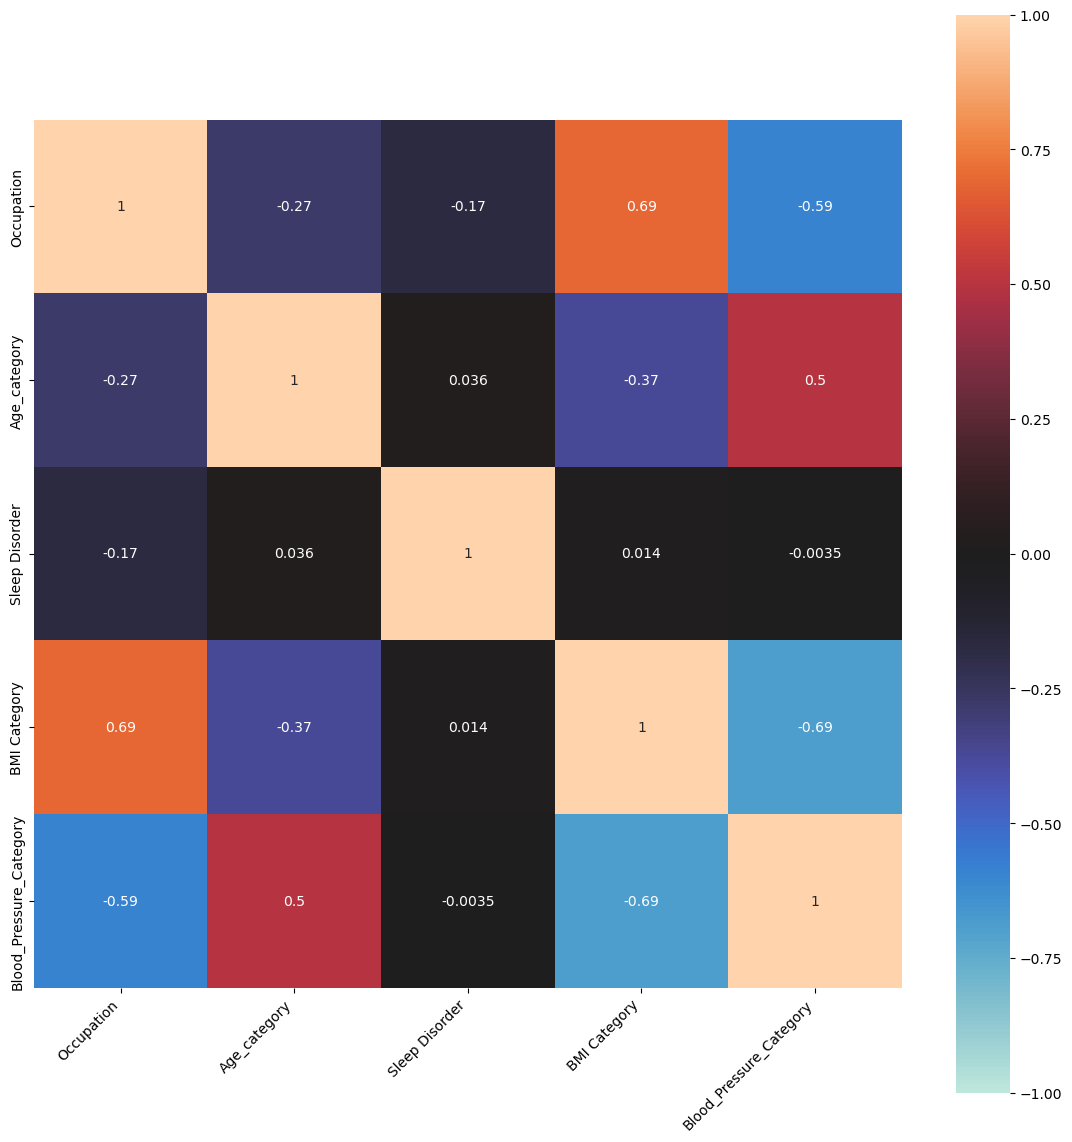

In [103]:
# Correlation of the features
corr = cat_features[['Occupation','Age_category','Sleep Disorder','BMI Category','Blood_Pressure_Category']].corr()

#PLotting a heatmap to view in diagram

plt.figure(figsize=(14, 14))
ax = sb.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, annot = True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')

corr

## FEATURE SELECTION

In [104]:
#Selecting features for our model

X=cat_features[['Occupation','Age_category','BMI Category']]
y=cat_features['Sleep Disorder']

In [105]:
cat_features['Sleep Disorder'].value_counts()

Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64

In [106]:
X.head()

,Occupation,Age_category,BMI Category
0,9,1,2
1,1,1,0
2,1,1,0
3,6,1,1
4,6,1,1


In [107]:
#Importing KBest  to be sure we picked the right features

from sklearn.feature_selection import SelectKBest,chi2
#Picking out the best two features
X_new=SelectKBest(k=2).fit_transform(X,y)

print(X_new[:10])




[[ 9  2]
 [ 1  0]
 [ 1  0]
 [ 6  1]
 [ 6  1]
 [ 9  1]
 [10  1]
 [ 1  0]
 [ 1  0]
 [ 1  0]]


The result shows that the features 'Occupation' and 'BMI Category' have the best relationship with the target 'Sleep Disorder'.

In [108]:
#Importing an algorithm to help us achieve this model.

from sklearn.linear_model import LogisticRegression

In [109]:
#Importing the test and train to see how accurate the algorithm is for this model

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [110]:
model=LogisticRegression().fit(X_train,y_train)

In [111]:
predictions=model.predict(X_test)

## MODEL EVALUATION

In [112]:
#Evaluating our model accuracy with sk.learn metrics

from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(y_test,predictions) )

Accuracy:  0.8


In [113]:
print('Accuracy: ',accuracy_score(y_train,model.predict(X_train)))

Accuracy:  0.8561872909698997


In [114]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.65      0.74        20
           1       0.82      0.90      0.86        41
           2       0.67      0.71      0.69        14

    accuracy                           0.80        75
   macro avg       0.79      0.76      0.76        75
weighted avg       0.81      0.80      0.80        75



In [115]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[13  5  2]
 [ 1 37  3]
 [ 1  3 10]]


<Axes: >

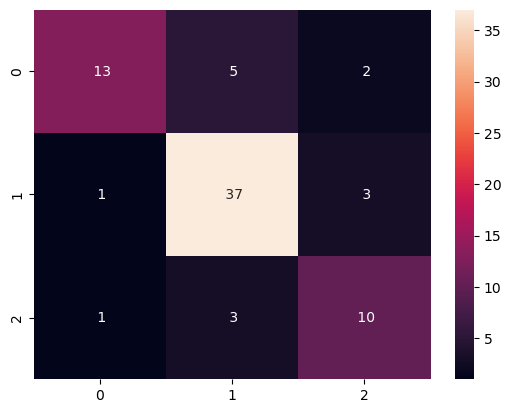

In [116]:
sb.heatmap(cm, annot=True, fmt=' .0f')